# 1. Data Loading & Exploration

## 1.1 Import Essential Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Load the Airlines Flights Dataset

In [2]:
df = pd.read_csv(r"C:\Users\dimit\OneDrive\Υπολογιστής\Kaggle\Airlines Flights\airlines_flights_data.csv")

## 1.3 Data Inspection

In [3]:
# Data info
print("Dataset shape:", df.shape)

Dataset shape: (300153, 12)


In [4]:
# First 5 rows
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
# Last 5 rows
print("\nLast 5 rows:")
df.tail()


Last 5 rows:


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [6]:
# Data types
print("\nData info:")
df.info()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
# Statistics for numerical columns
print("\nDescriptive statistics:")
df.describe()


Descriptive statistics:


,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


## 1.4 Data Quality

In [8]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [9]:
# Check for duplicate rows
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


# 2. Data Cleaning & Preprocessing

## 2.1 Drop Redundant Columns

In [10]:
# Drop the index column
df = df.drop('index', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


## 2.2 Convert duration Column from Hours to Minutes

In [11]:
print("Duration column format:", df["duration"].head())

# Convert hours to minutes
df["duration_min"] = df["duration"] * 60

print("Duration column format (in minutes):", df["duration_min"].head())

Duration column format: 0    2.17
1    2.33
2    2.17
3    2.25
4    2.33
Name: duration, dtype: float64
Duration column format (in minutes): 0    130.2
1    139.8
2    130.2
3    135.0
4    139.8
Name: duration_min, dtype: float64


## 2.3 Process stops Column

In [12]:
# Convert stops to numeric
print("Stops categories:", df["stops"].value_counts())

stops_mapping = {"zero": 0, 'one': 1, "two_or_more": 3}
df["stops_num"] = df["stops"].map(stops_mapping)

Stops categories: stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64


## 2.4 Feature Engineering

### 2.4.1 Create route

In [13]:
df["route"] = df["source_city"] + " -> " + df["destination_city"]
print(df["route"].head())

0    Delhi -> Mumbai
1    Delhi -> Mumbai
2    Delhi -> Mumbai
3    Delhi -> Mumbai
4    Delhi -> Mumbai
Name: route, dtype: object


### 2.4.2 Create booking urgency categories

In [14]:
df["booking_urgency"] = pd.cut(df["days_left"], 
                        bins=[0, 3, 7, 30, 60], 
                        labels=["Last-minute (0-3 days)", "Near-term (4-7 days)", "Standard (8-30 days)", "Long advance (31-60 days)"],
                        include_lowest=True)

### 2.4.3 Create duration categories

In [15]:
df["duration_category"] = pd.cut(df["duration"], 
                          bins=[0, 3, 6, 12, 60], 
                          labels=["Short-haul (0-3h)", "Medium-haul (3-6h)", "Long-haul (6-12h)", "Very Long-haul (12h+)"],
                          include_lowest=True)

## 2.5 Data Check

In [16]:
# Final validation
print("Cleaned dataset info:")
df.info()
print(f"\nFinal shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   airline            300153 non-null  object  
 1   flight             300153 non-null  object  
 2   source_city        300153 non-null  object  
 3   departure_time     300153 non-null  object  
 4   stops              300153 non-null  object  
 5   arrival_time       300153 non-null  object  
 6   destination_city   300153 non-null  object  
 7   class              300153 non-null  object  
 8   duration           300153 non-null  float64 
 9   days_left          300153 non-null  int64   
 10  price              300153 non-null  int64   
 11  duration_min       300153 non-null  float64 
 12  stops_num          300153 non-null  int64   
 13  route              300153 non-null  object  
 14  booking_urgency    300153 non-null  category
 15  duration_cat

# 3. Explaratory Data Analysis

In [17]:
# Separate different variables for analysis
categorical_columns = ['airline', 'source_city', 'departure_time', 'stops', 
                      'arrival_time', 'destination_city', 'class']
numerical_columns = ['duration', 'days_left', 'price', 'stops_num']

## 3.1 Univariate Analysis

### 3.1.1 Categorical Columns

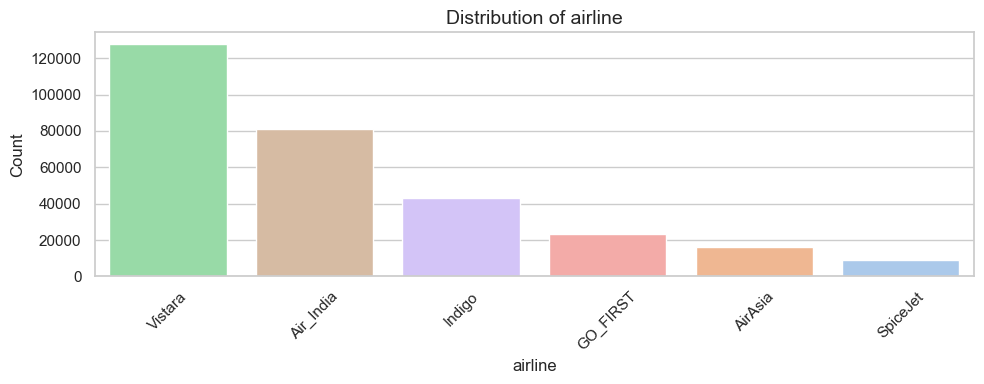

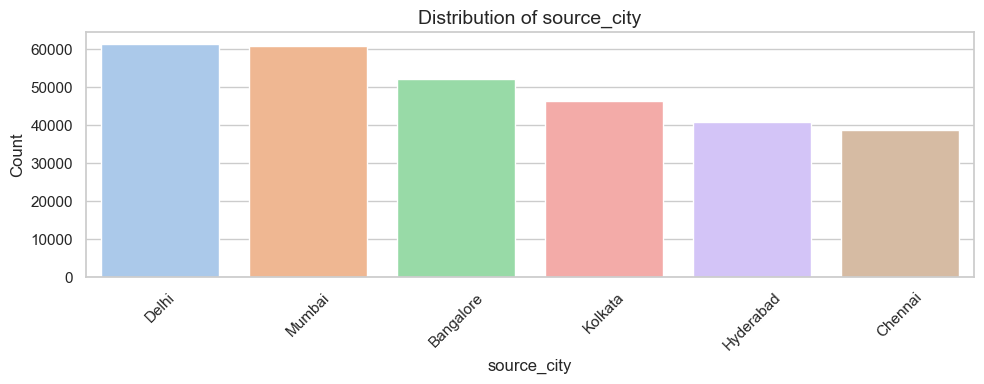

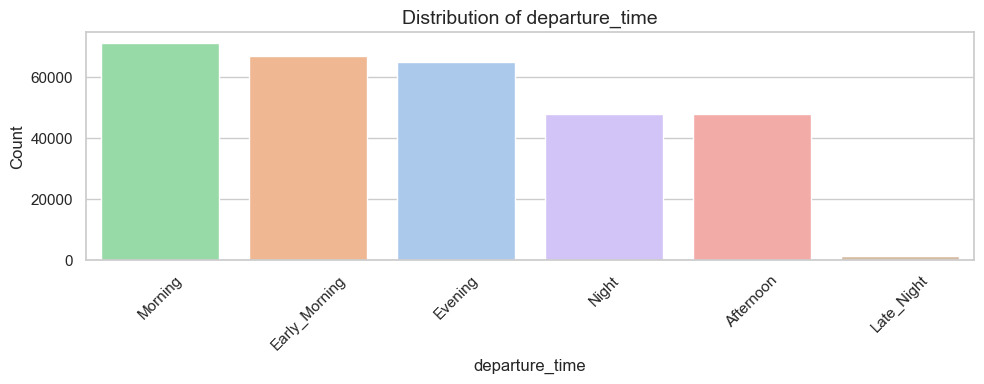

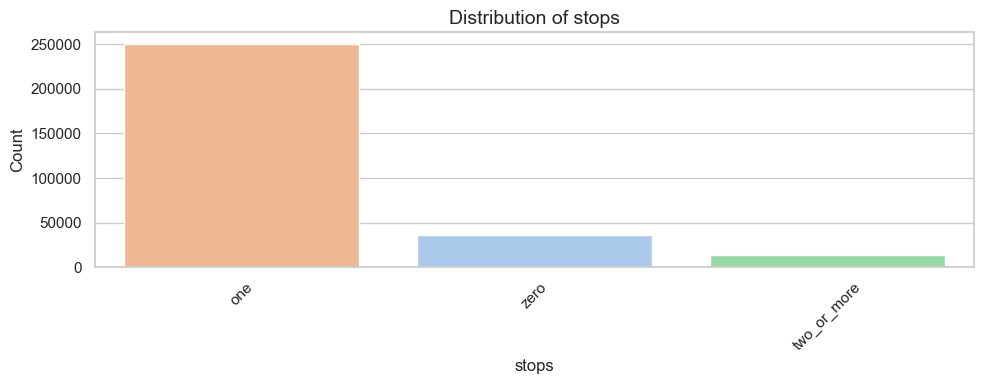

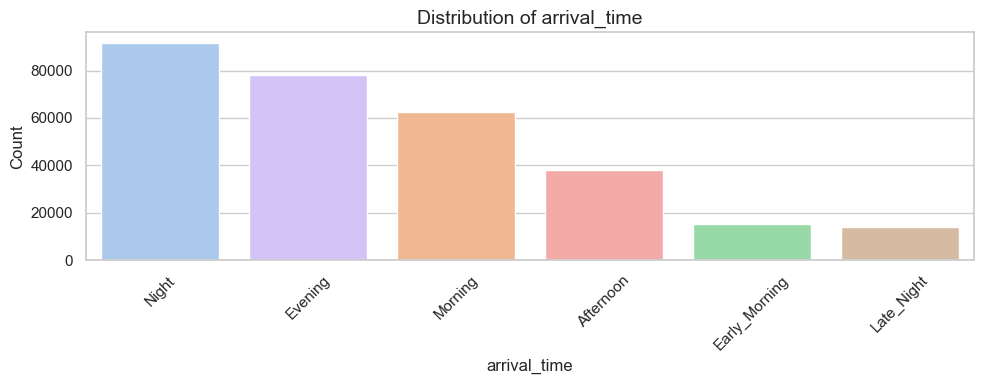

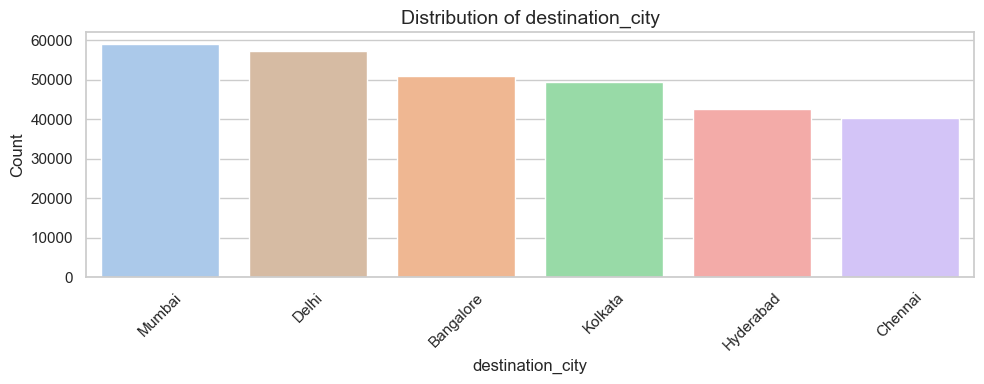

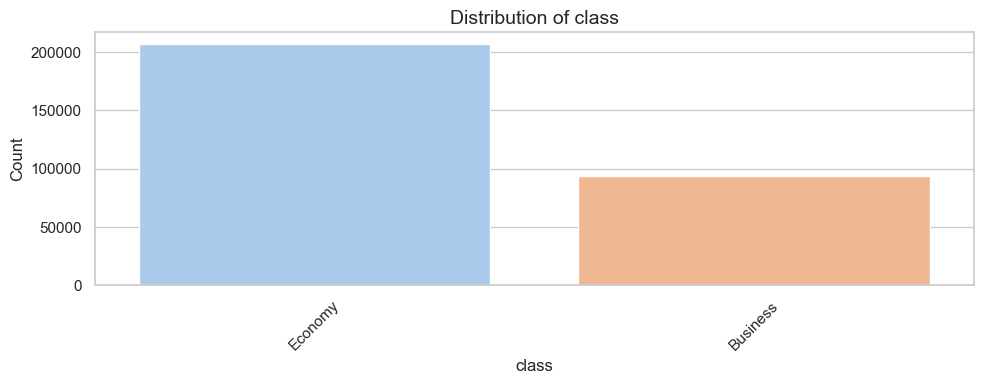

In [18]:
sns.set(style="whitegrid")

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue=col, order=df[col].value_counts().index, palette="pastel", legend=False)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3.1.2 Numerical Columns

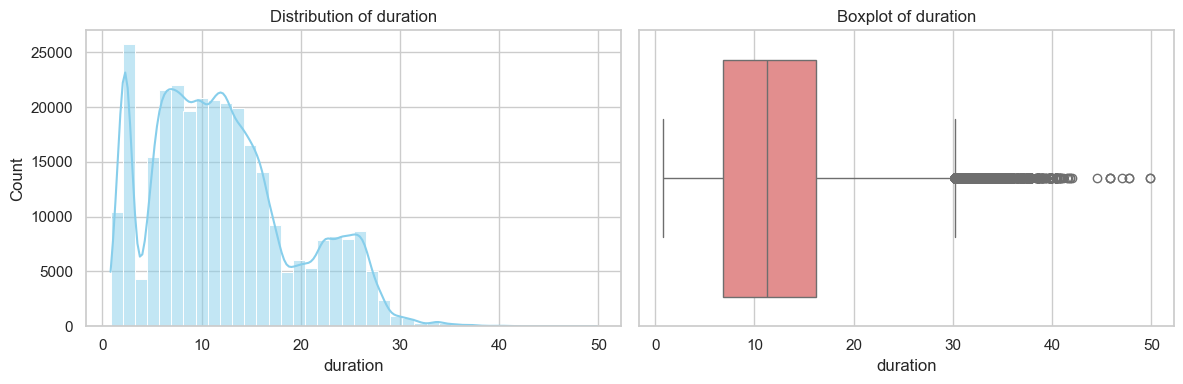

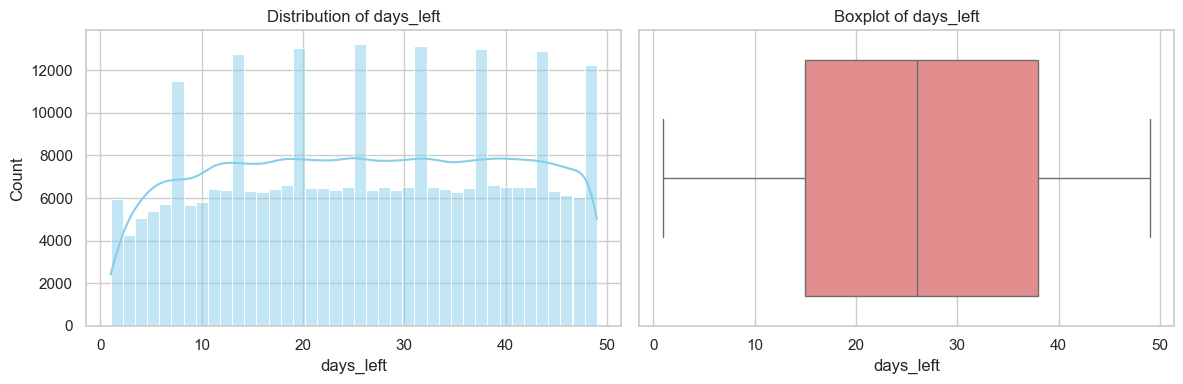

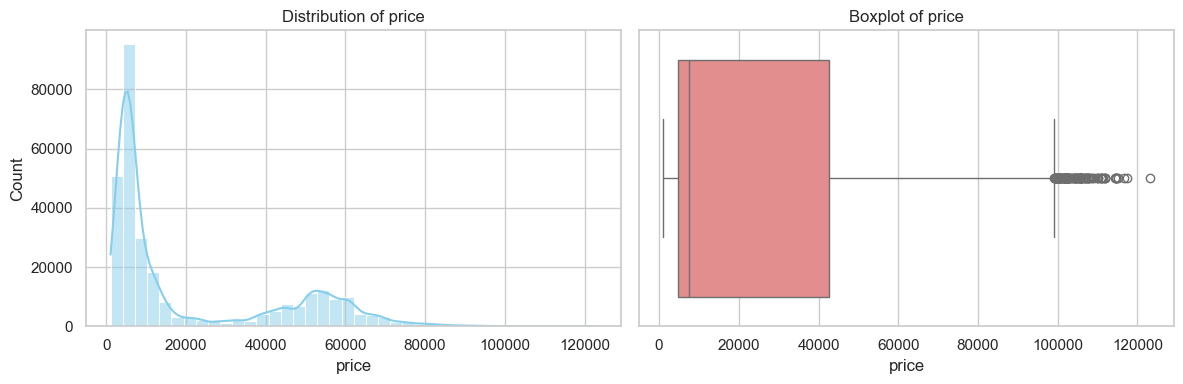

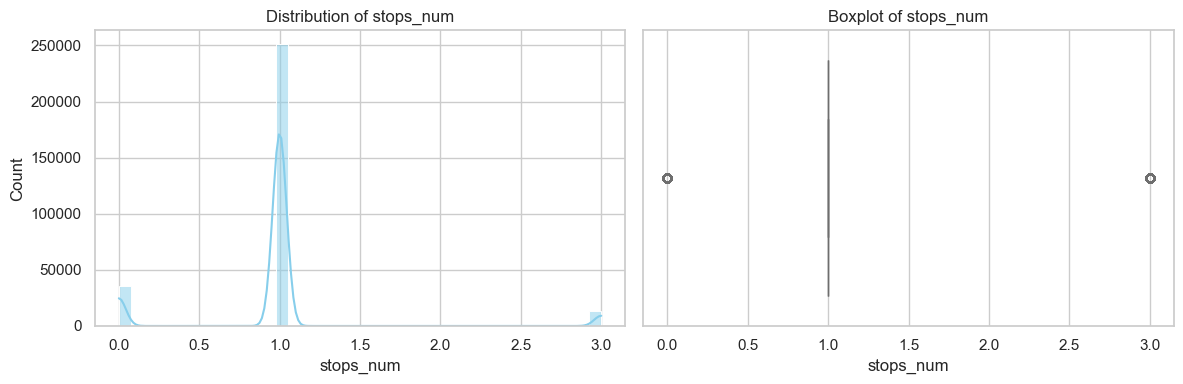

In [19]:
for col in numerical_columns:
    plt.figure(figsize=(12, 4))

    # Histogram   
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=40, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


## 3.2 Bivariate Analysis

### 3.2.1 Price by Categorical Features

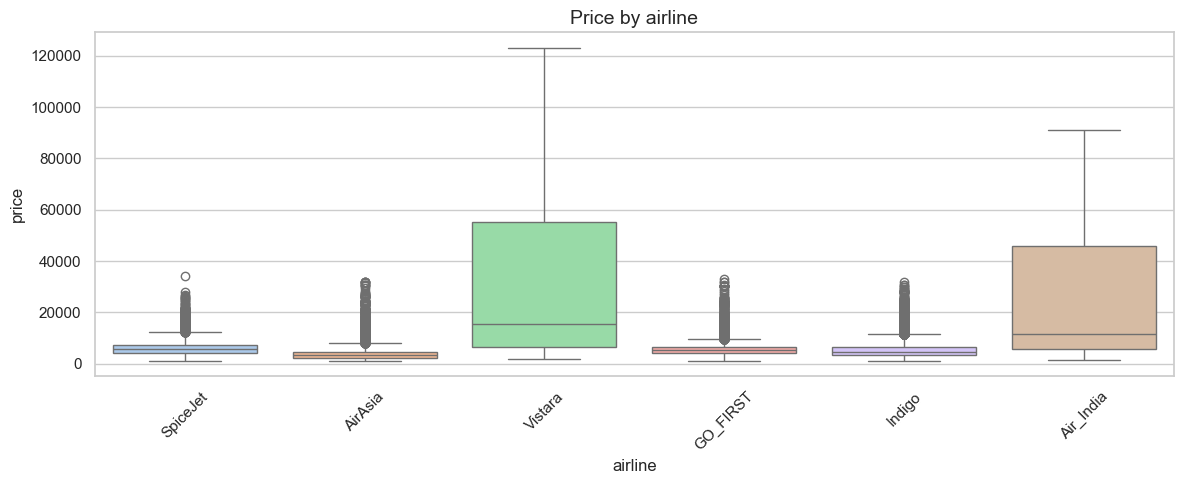

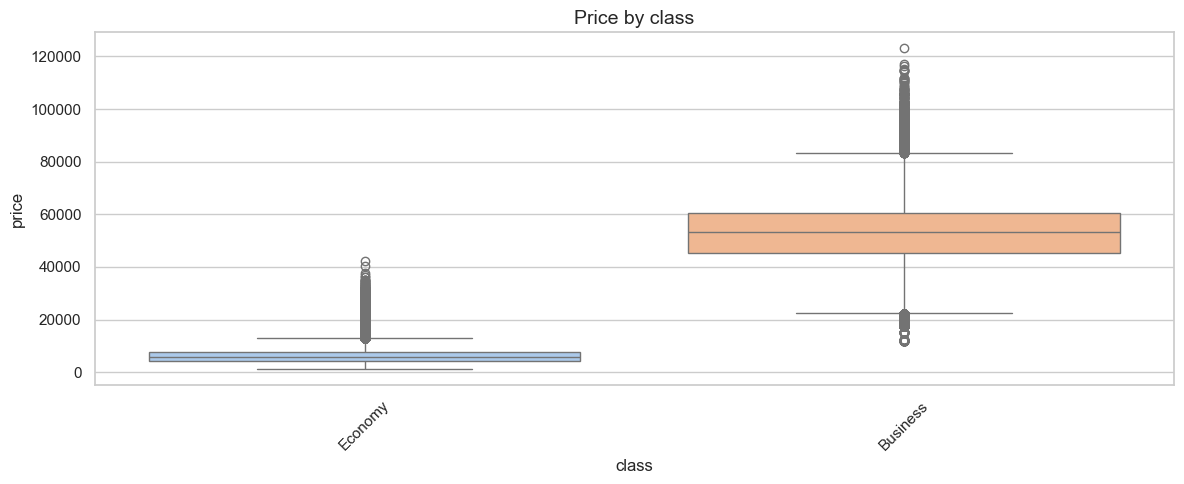

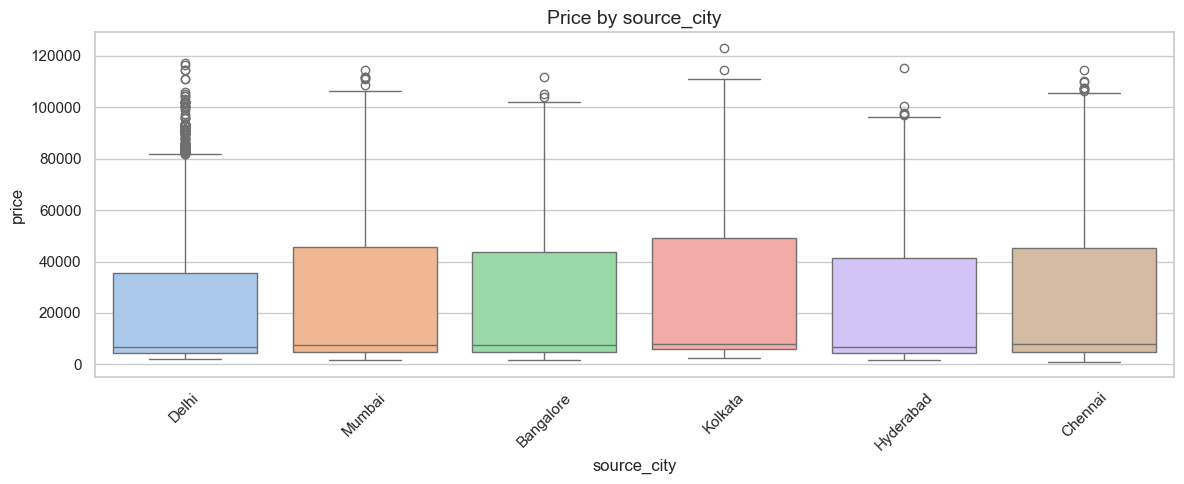

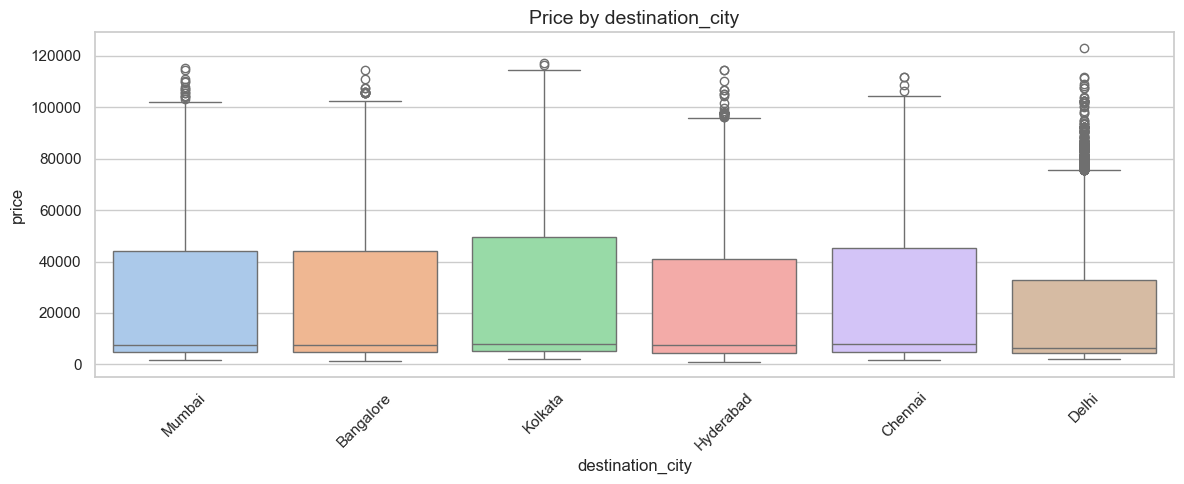

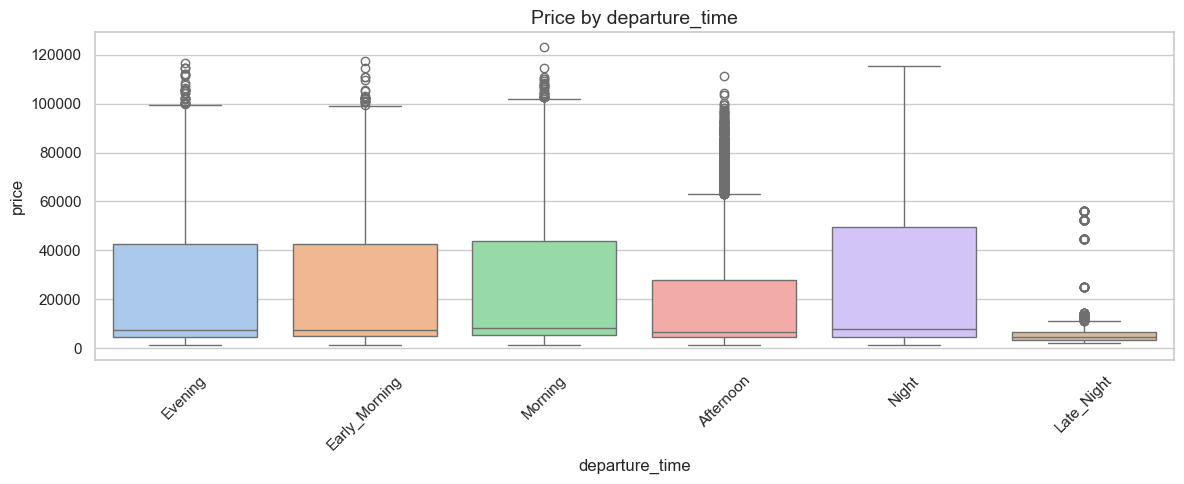

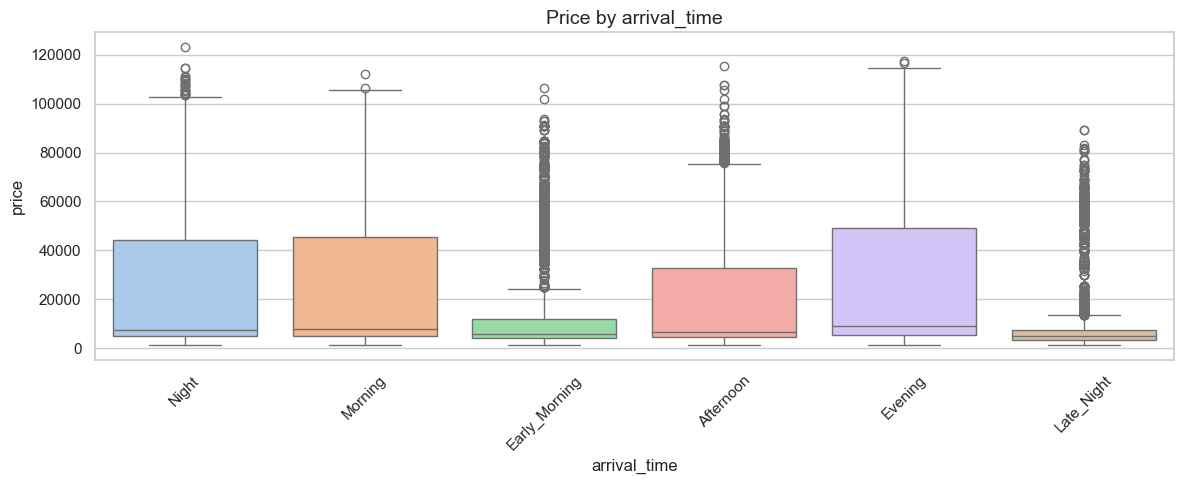

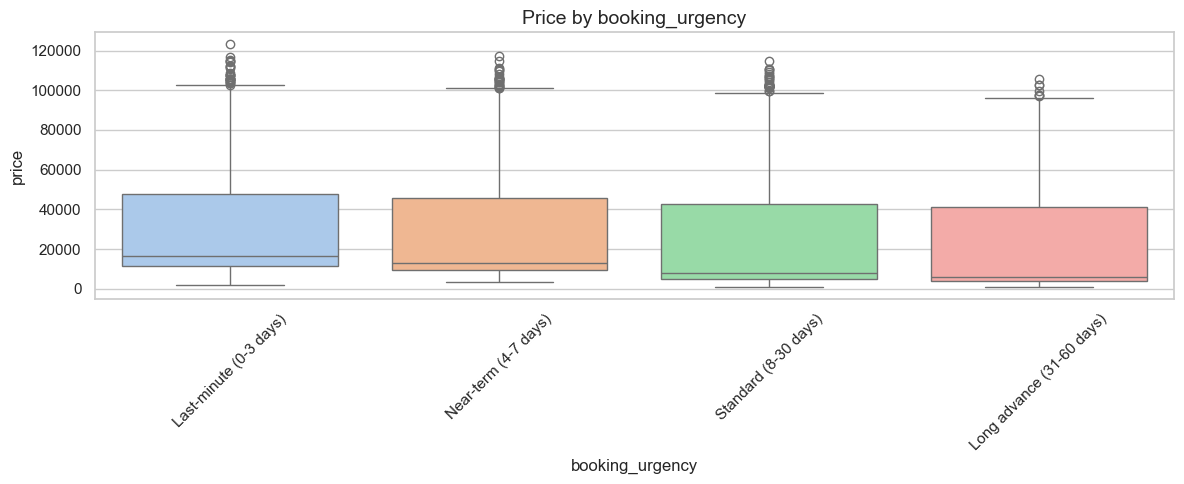

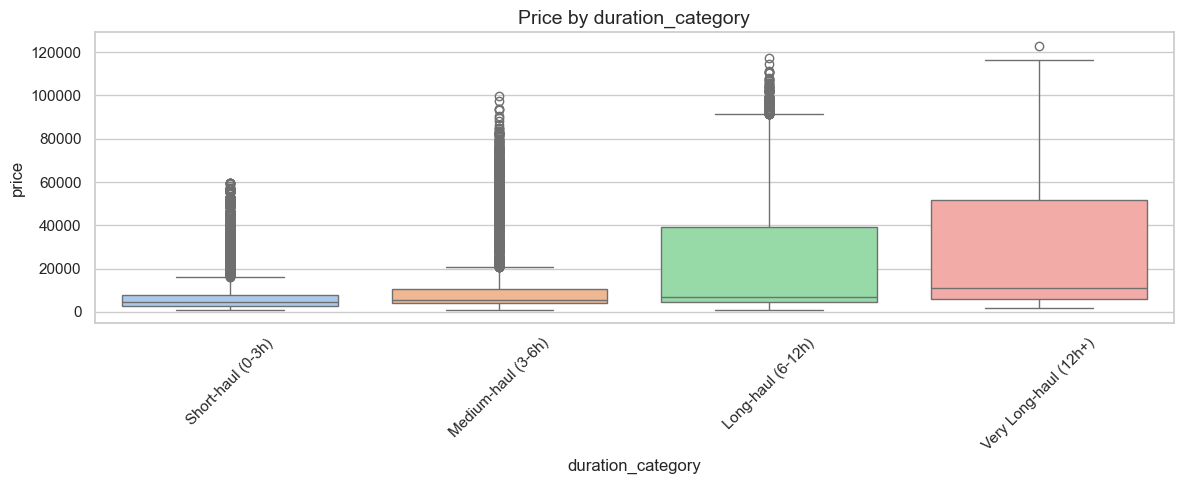

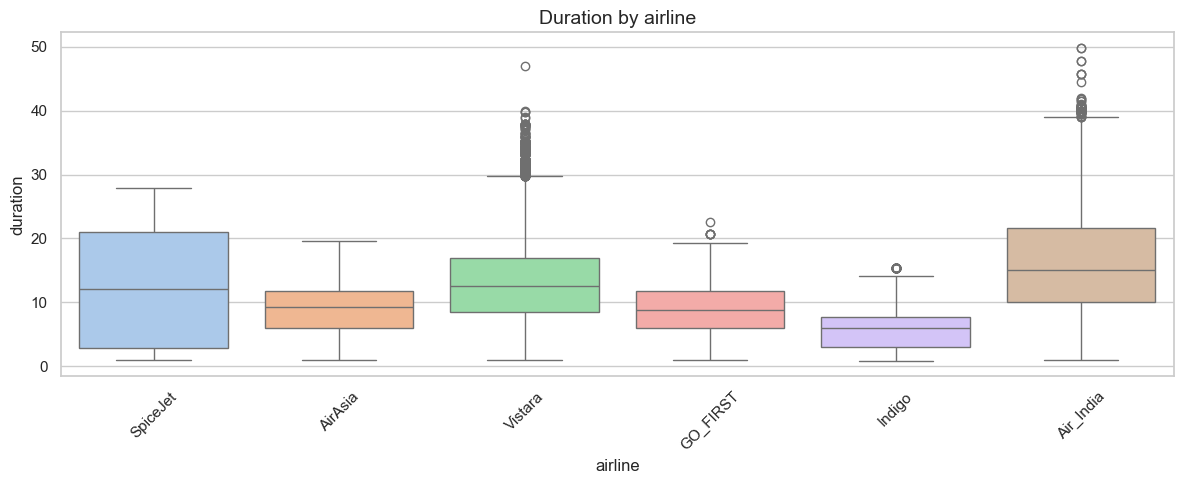

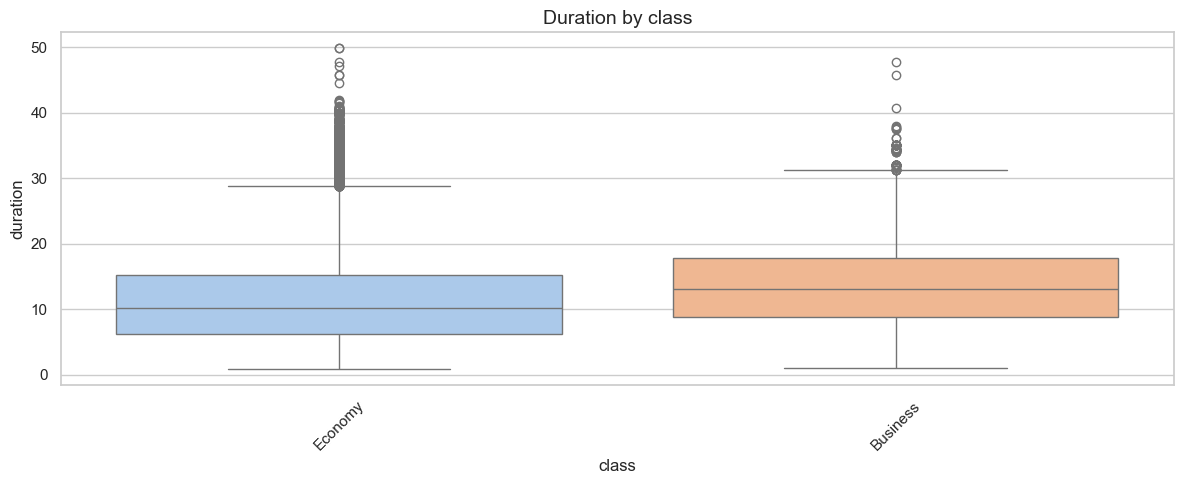

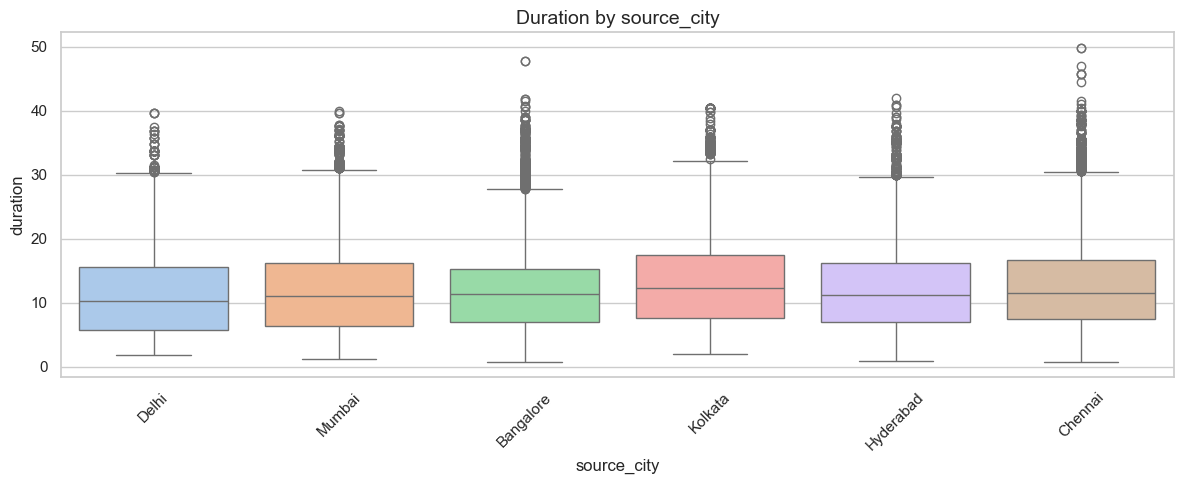

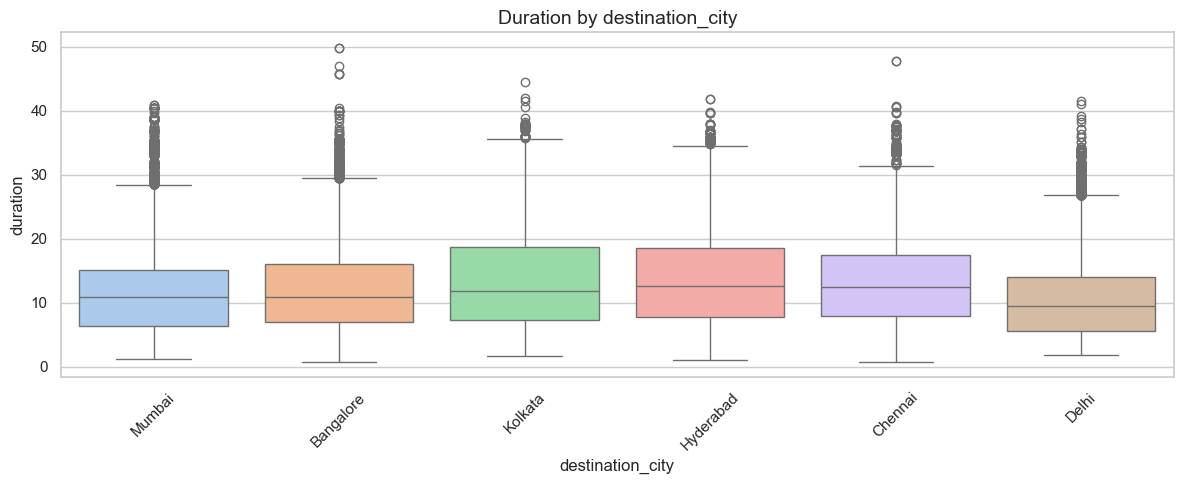

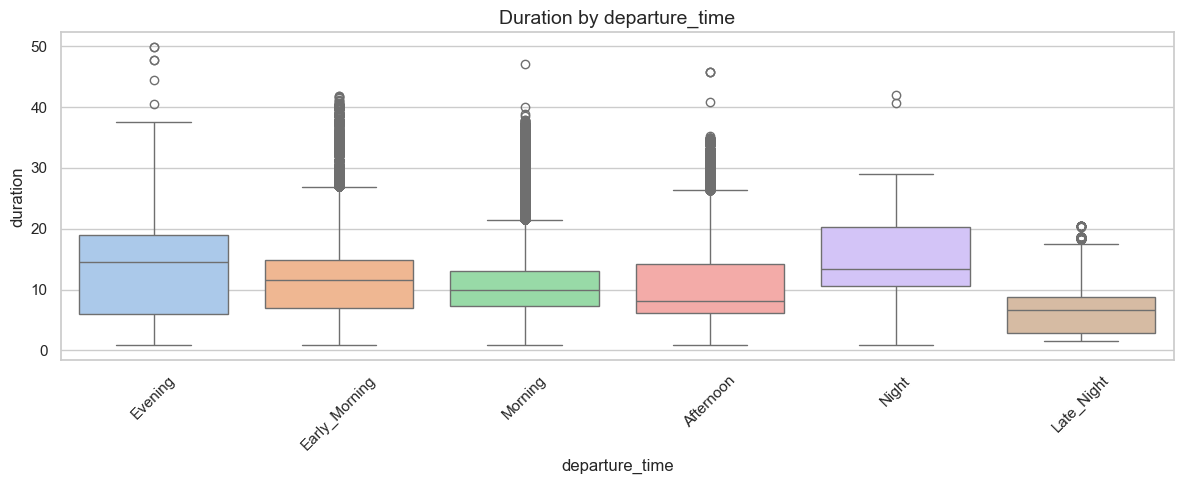

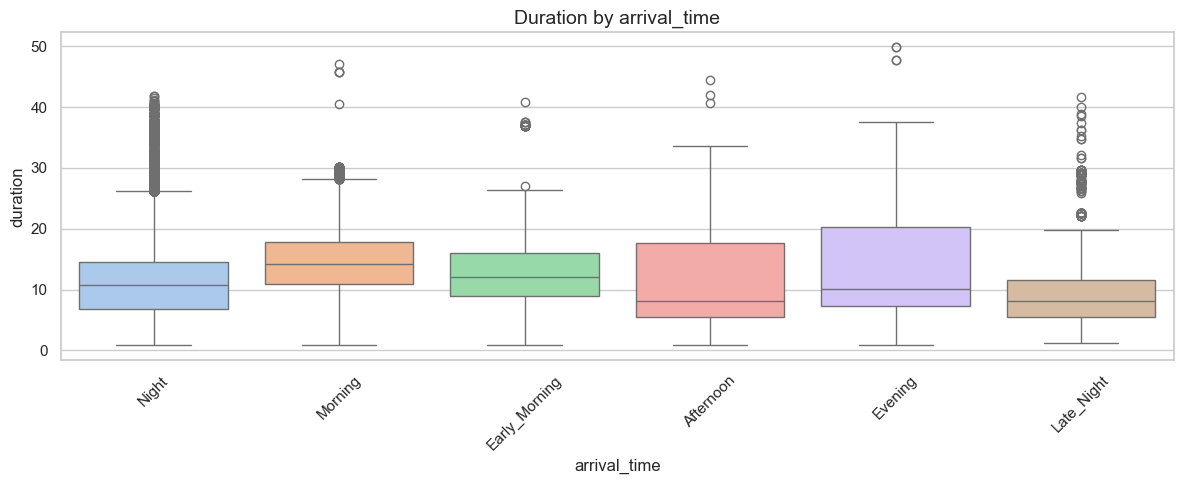

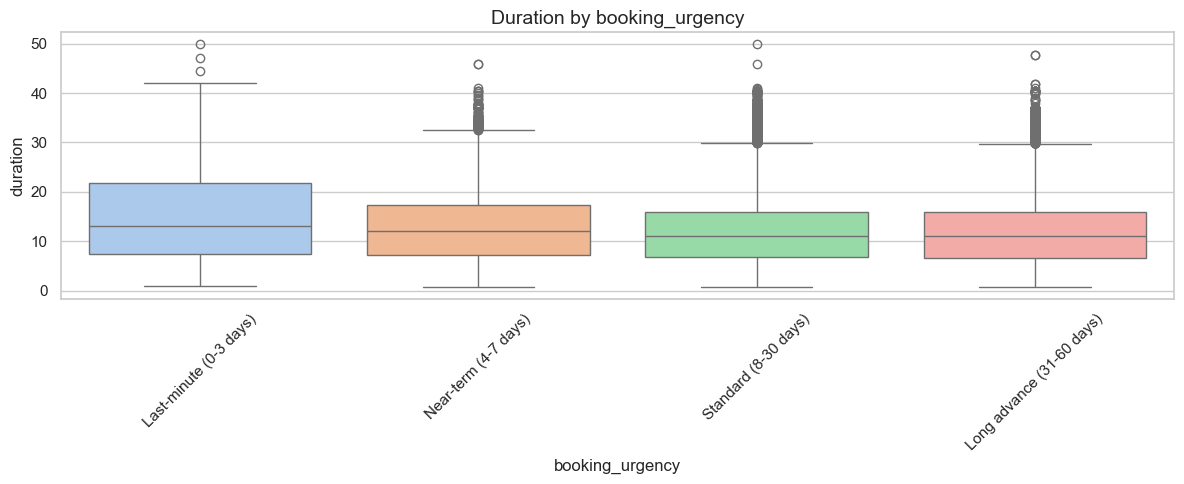

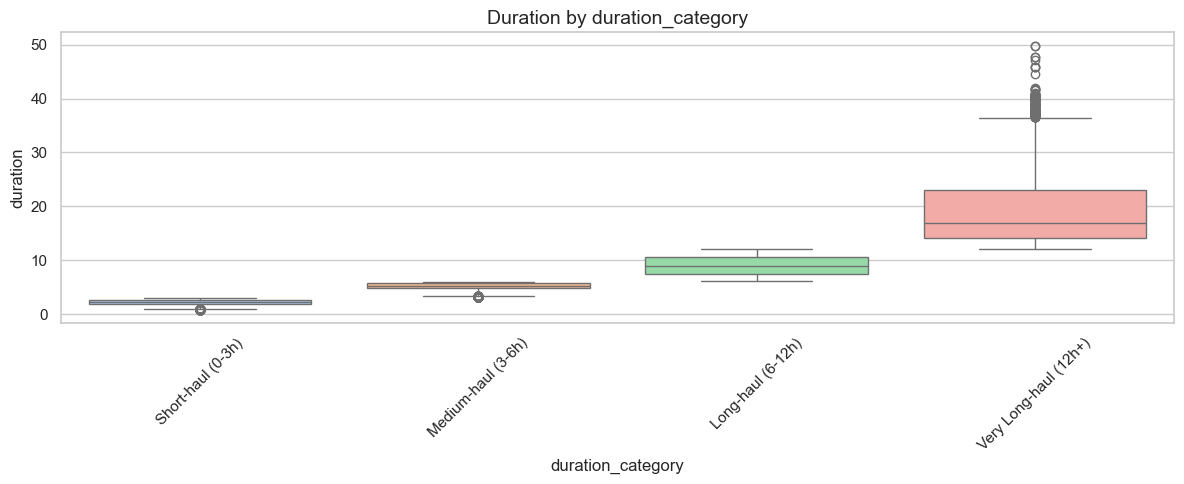

In [20]:
bivariate_targets = ['price', 'duration']
bivariate_features = ['airline', 'class', 'source_city', 'destination_city', 
                      'departure_time', 'arrival_time', 'booking_urgency', 'duration_category']

for target in bivariate_targets:
    for feature in bivariate_features:
        plt.figure(figsize=(12, 5))
        sns.boxplot(data=df, x=feature, y=target, hue=feature, palette="pastel", legend=False)
        plt.title(f'{target.capitalize()} by {feature}', fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

### 3.2.2 Duration vs Price

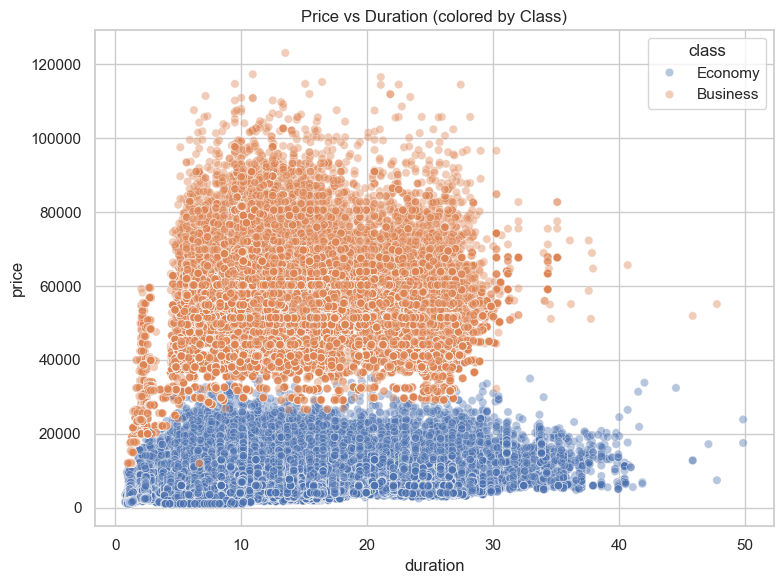

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='duration', y='price', hue='class', alpha=0.4)
plt.title("Price vs Duration (colored by Class)")
plt.tight_layout()
plt.show()

### 3.2.3 Correlation Heatmap

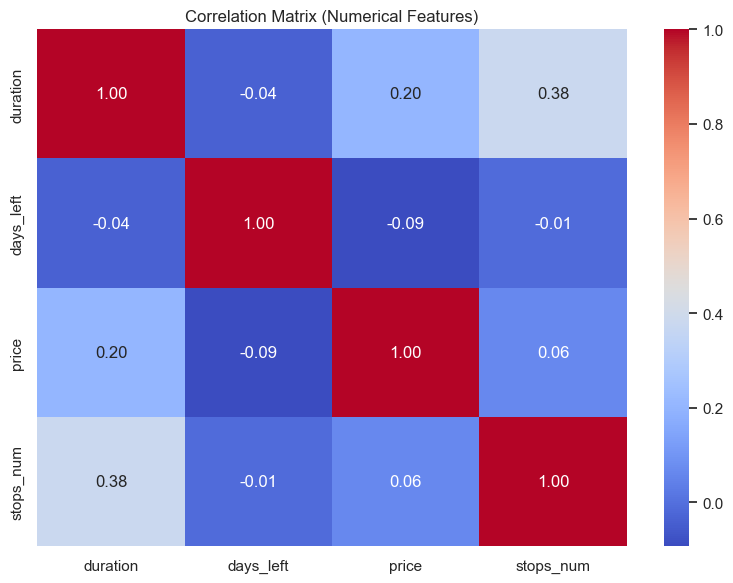

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()

## 3.3 Multivariate Analysis

### 3.3.1 Average Price per Route

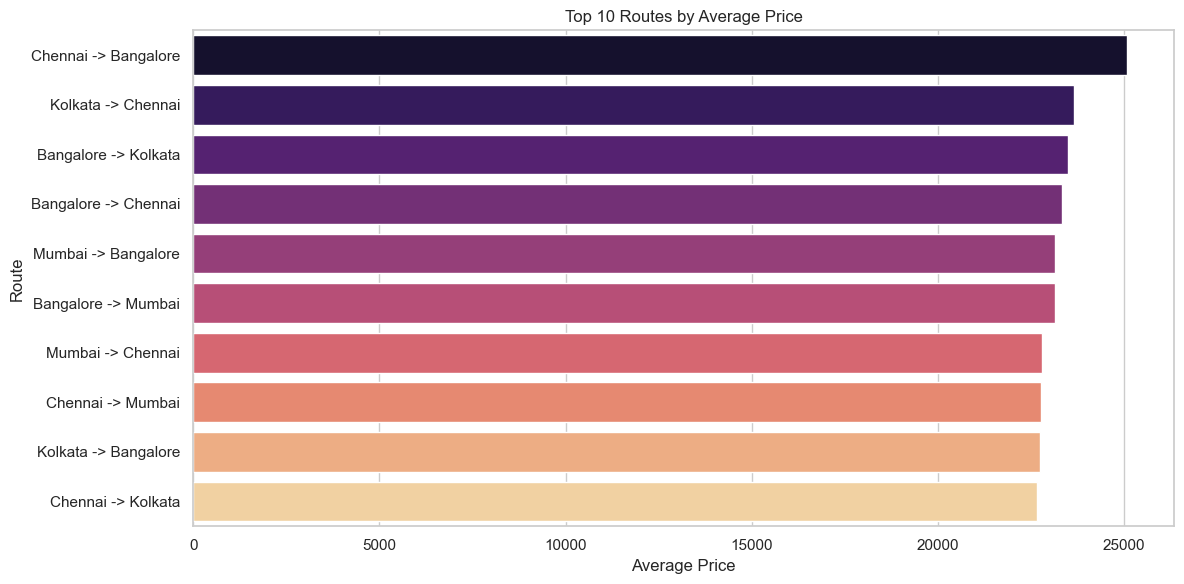

In [23]:
# Top 10 most expensive routes
top_routes_price = df.groupby("route")["price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_routes_price.values, y=top_routes_price.index, hue=top_routes_price.index, palette="magma", legend=False)
plt.title("Top 10 Routes by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Route")
plt.tight_layout()
plt.show()

### 3.3.2 Average Price by Airline & Class

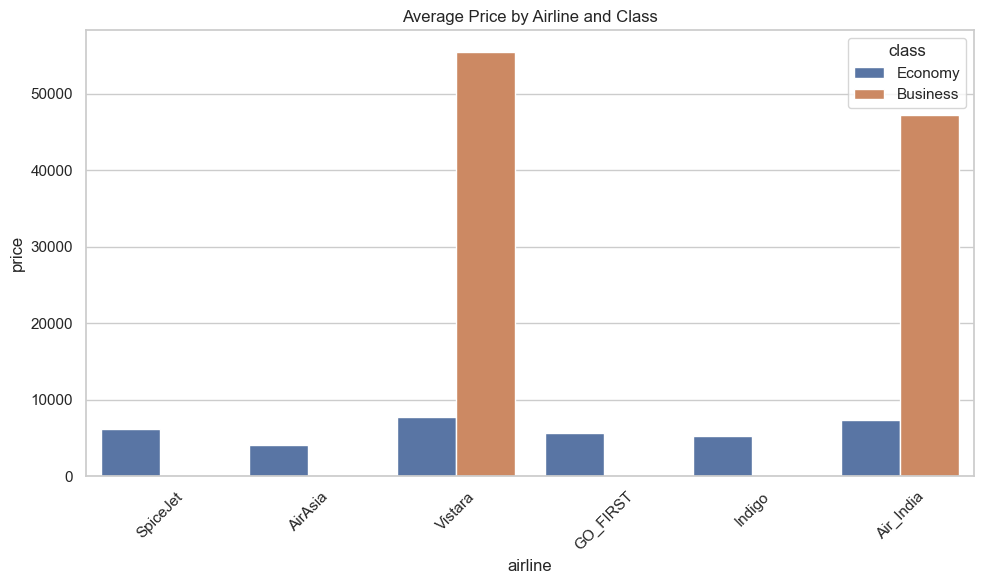

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="airline", y="price", hue="class", errorbar=('ci', False))
plt.title("Average Price by Airline and Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.3.3 Booking Urgency vs Price

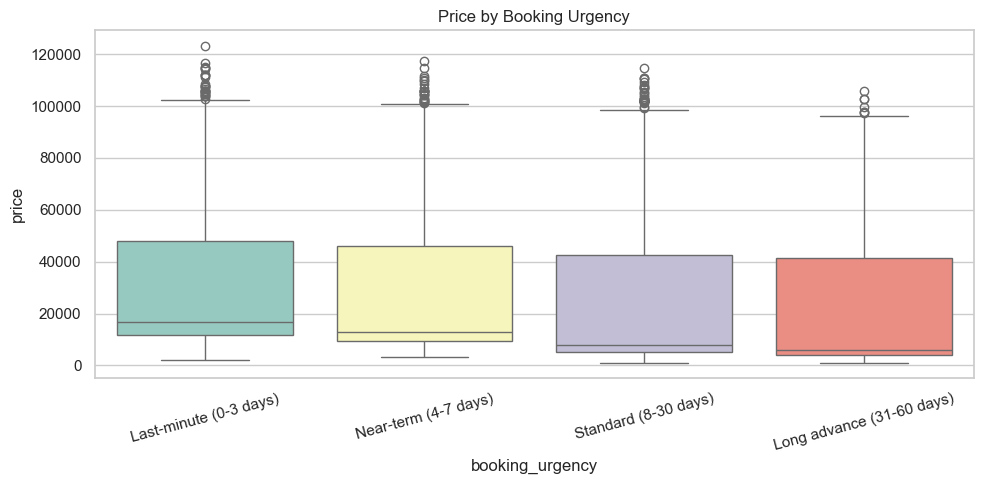

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="booking_urgency", y="price", hue="booking_urgency", palette="Set3", legend=False)
plt.title("Price by Booking Urgency")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### 3.3.4 Route Frequency Heatmap

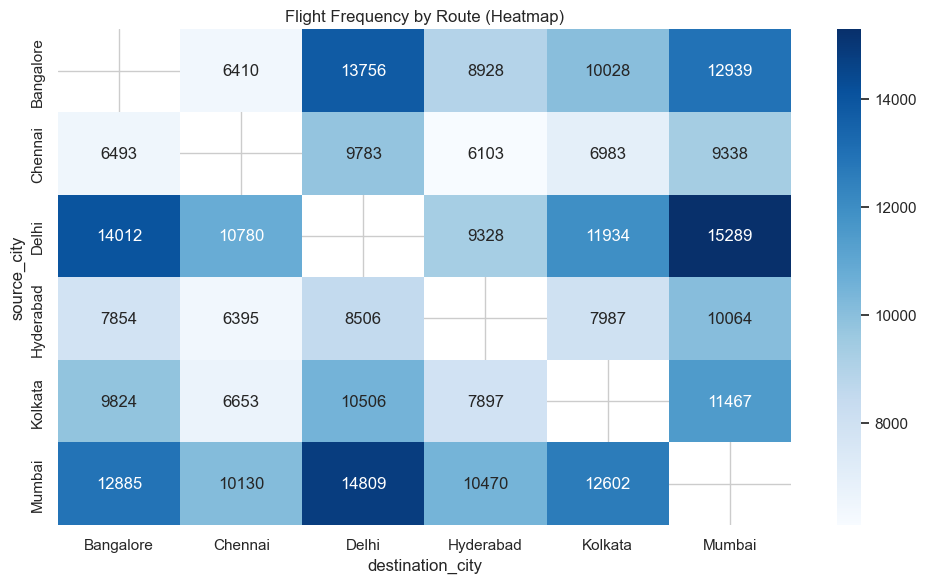

In [26]:
route_counts = df.groupby(["source_city", "destination_city"]).size().reset_index(name="count")
route_pivot = route_counts.pivot(index="source_city", columns="destination_city", values="count")

plt.figure(figsize=(10, 6))
sns.heatmap(route_pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Flight Frequency by Route (Heatmap)")
plt.tight_layout()
plt.show()

In [27]:
df.to_csv("airline_data_cleaned.csv", index=False)

# Export the Dataset to CSV

In [28]:
import os

file_name = "airline_flights_cleaned.csv"
folder_path = r"C:\Users\dimit\OneDrive\Υπολογιστής\Kaggle\Airlines Flights"
full_path = os.path.join(folder_path, file_name)

os.makedirs(folder_path, exist_ok=True)

# Save as CSV
df.to_csv(full_path, index=False)

print(f"File saved at: {full_path}")

File saved at: C:\Users\dimit\OneDrive\Υπολογιστής\Kaggle\Airlines Flights\airline_flights_cleaned.csv
